Выберите ряд и постройте его модель ARIMA/GARCH.

In [39]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import matplotlib.pyplot as plt
from scipy.stats import boxcox
from scipy.optimize import minimize
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima_model import ARIMA
from arch import arch_model
%matplotlib inline

In [26]:
def test_stationarity(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for [key, value] in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

In [27]:
def tsplot(y, lags=None, figsize=(14, 8), style='bmh'):
    test_stationarity(y)
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):
        plt.figure(figsize=figsize)
        layout = (5, 1)
        ts_ax = plt.subplot2grid(layout, (0, 0), rowspan=2)
        acf_ax = plt.subplot2grid(layout, (2, 0))
        pacf_ax = plt.subplot2grid(layout, (3, 0))
        qq_ax = plt.subplot2grid(layout, (4, 0))

        y.plot(ax=ts_ax, color='blue', label='Or')
        ts_ax.set_title('Original')

        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05)
        sm.qqplot(y, line='s', ax=qq_ax)
        
        plt.tight_layout()
    return

In [59]:
def _get_best_model(TS,n=5):
    best_aic = np.inf 
    best_order = None
    best_mdl = None

    for i in range(n):
        for d in range(n):
            for j in range(n):
                try:
                    tmp_mdl = smt.ARIMA(TS, order=(i,d,j)).fit(
                        method='mle', trend='nc'
                    )
                    tmp_aic = tmp_mdl.aic
                    if tmp_aic < best_aic:
                        best_aic = tmp_aic
                        best_order = (i, d, j)
                        best_mdl = tmp_mdl
                except: continue
    print('aic: {:6.5f} | order: {}'.format(best_aic, best_order))                    
    return best_aic, best_order, best_mdl

In [60]:
airlines_passengers = pd.read_csv("international-airline-passengers.csv")['Count']

Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


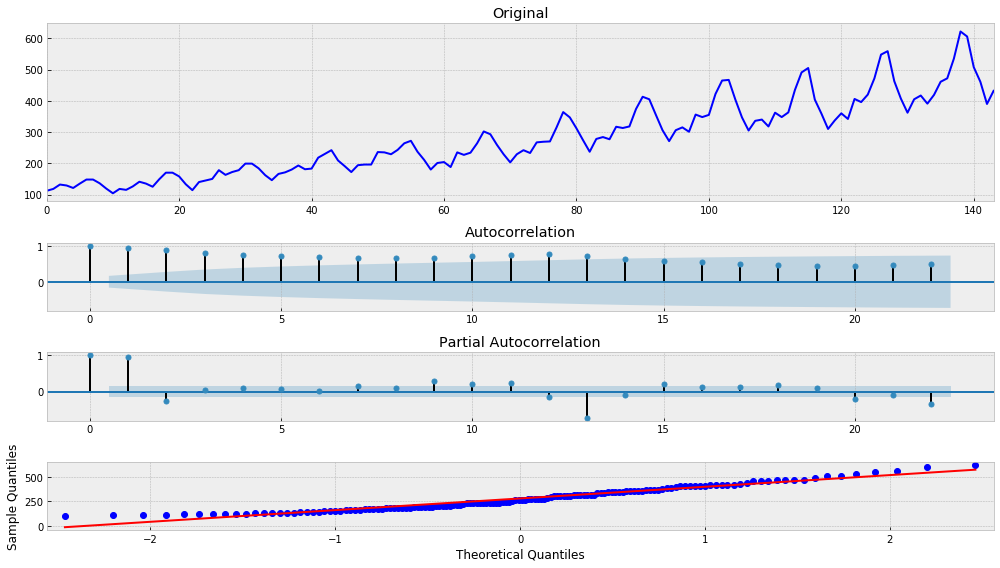

In [30]:
tsplot(airlines_passengers)

In [31]:
airlines_passengers_stat = boxcox(airlines_passengers,0)
airlines_passengers_stat = airlines_passengers_stat[1:] - airlines_passengers_stat[:-1]
airlines_passengers_stat = airlines_passengers_stat[12:] - airlines_passengers_stat[:-12]

In [61]:
aic, order, mdl = _get_best_model(airlines_passengers_stat)

e:\Users\chefranov_as\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
e:\Users\chefranov_as\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
e:\Users\chefranov_as\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


aic: -461.63881 | order: (4, 0, 4)


e:\Users\chefranov_as\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


In [62]:
aic2, order2, mdl2 = _get_best_model(airlines_passengers_stat,n=12)

e:\Users\chefranov_as\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
e:\Users\chefranov_as\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)
e:\Users\chefranov_as\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
e:\Users\chefranov_as\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
e:\Users\chefranov_as\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversi

e:\Users\chefranov_as\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
e:\Users\chefranov_as\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
e:\Users\chefranov_as\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
e:\Users\chefranov_as\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
e:\Users\chefranov_as\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\m

e:\Users\chefranov_as\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
e:\Users\chefranov_as\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
e:\Users\chefranov_as\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
e:\Users\chefranov_as\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
e:\Users\chefranov_as\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmo

e:\Users\chefranov_as\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
e:\Users\chefranov_as\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
e:\Users\chefranov_as\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
e:\Users\chefranov_as\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
e:\Users\chefranov_as\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\m

aic: -468.46253 | order: (9, 0, 8)


In [72]:
#прикольно - другие веса на большом переборе - но считалось очень долго, а прирост не очень большое, но p-val стал вообще почти ноль

Results of Dickey-Fuller Test:
Test Statistic                  -4.343312
p-value                          0.000373
#Lags Used                      11.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64


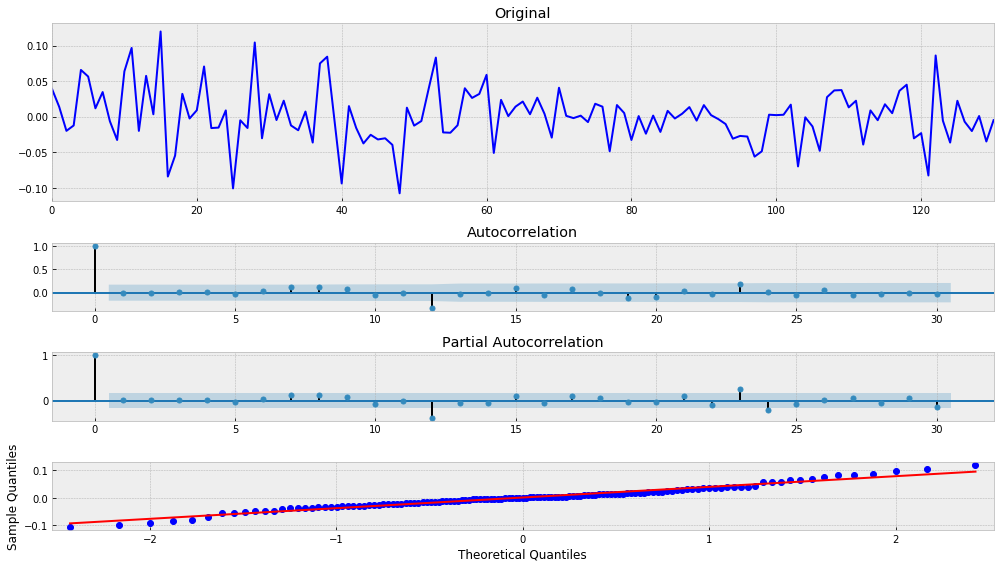

In [33]:
tsplot(mdl.resid, lags=30)

Results of Dickey-Fuller Test:
Test Statistic                -1.141134e+01
p-value                        7.238049e-21
#Lags Used                     0.000000e+00
Number of Observations Used    1.300000e+02
Critical Value (1%)           -3.481682e+00
Critical Value (5%)           -2.884042e+00
Critical Value (10%)          -2.578770e+00
dtype: float64


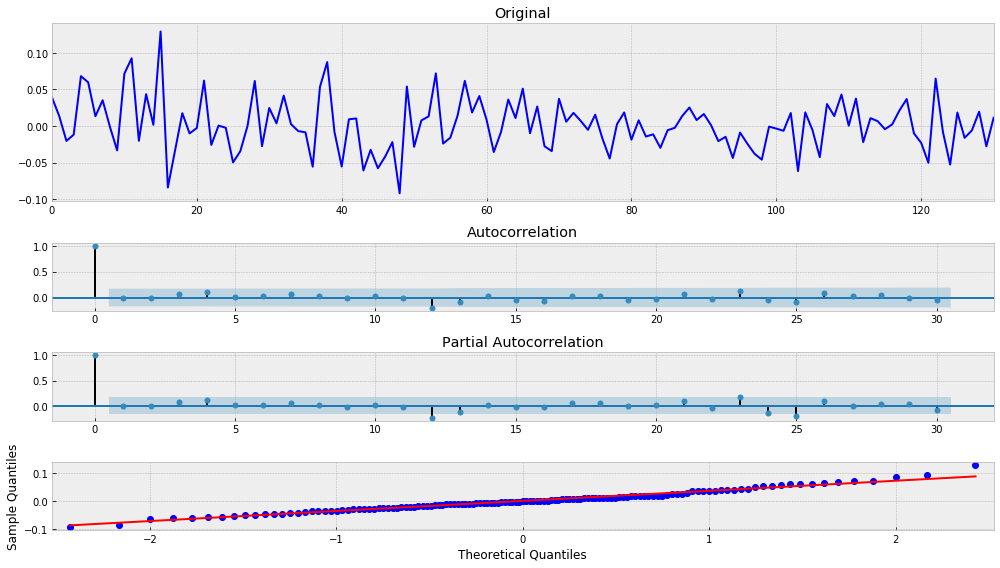

In [68]:
tsplot(mdl2.resid, lags=30)

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  131
Model:                     ARMA(4, 4)   Log Likelihood                 239.959
Method:                       css-mle   S.D. of innovations              0.038
Date:                Thu, 23 Apr 2020   AIC                           -459.918
Time:                        14:04:08   BIC                           -431.166
Sample:                             0   HQIC                          -448.234
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0002      0.000     -0.553      0.581      -0.001       0.001
ar.L1.y        0.7780      0.239      3.258      0.001       0.310       1.246
ar.L2.y       -0.7042      0.214     -3.285      0.0

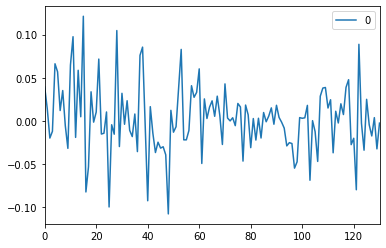

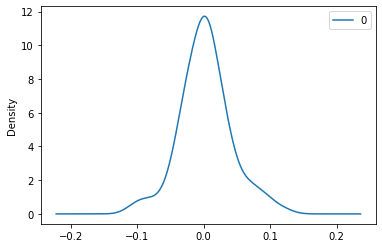

                0
count  131.000000
mean     0.002588
std      0.039065
min     -0.107461
25%     -0.019798
50%      0.002982
75%      0.021891
max      0.121305


In [35]:
model = ARIMA(airlines_passengers_stat, order=order)
model_fit = model.fit(disp=0)
print(model_fit.summary())
# plot residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

In [47]:
aic1, order1, mdl1 = _get_best_model(airlines_passengers)

e:\Users\chefranov_as\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
e:\Users\chefranov_as\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
e:\Users\chefranov_as\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
e:\Users\chefranov_as\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
e:\Users\chefranov_as\AppData\Local\Continuum\anaconda3\lib\site-packa

aic: 1344.38474 | order: (3, 1, 3)


e:\Users\chefranov_as\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


Results of Dickey-Fuller Test:
Test Statistic                  -5.229643
p-value                          0.000008
#Lags Used                      14.000000
Number of Observations Used    128.000000
Critical Value (1%)             -3.482501
Critical Value (5%)             -2.884398
Critical Value (10%)            -2.578960
dtype: float64


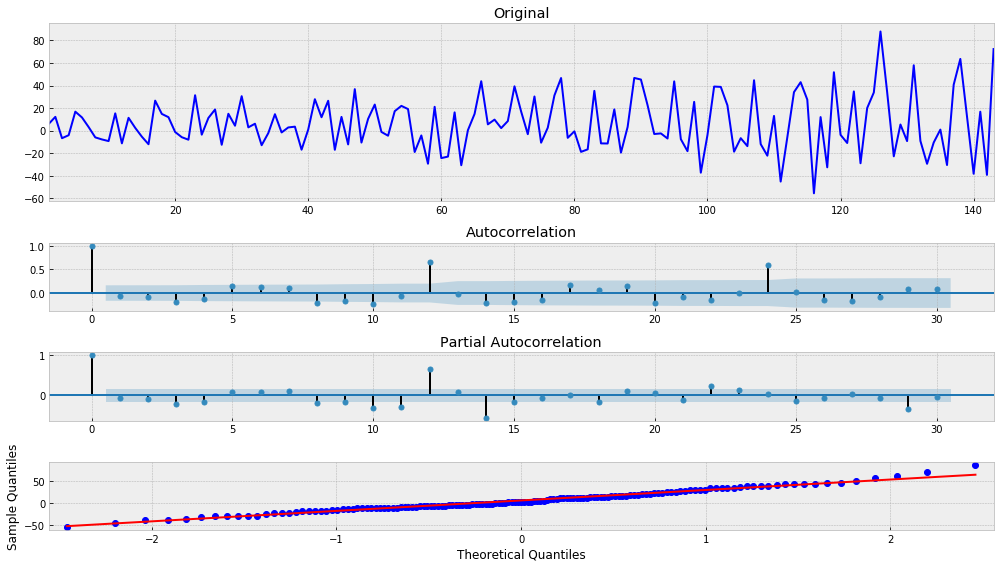

In [48]:
tsplot(mdl1.resid, lags=30)

                             ARIMA Model Results                              
Dep. Variable:                D.Count   No. Observations:                  143
Model:                 ARIMA(3, 1, 3)   Log Likelihood                -660.388
Method:                       css-mle   S.D. of innovations             23.754
Date:                Thu, 23 Apr 2020   AIC                           1336.776
Time:                        14:14:46   BIC                           1360.478
Sample:                             1   HQIC                          1346.407
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             2.5782      0.775      3.325      0.001       1.059       4.098
ar.L1.D.Count     0.9661      0.100      9.613      0.000       0.769       1.163
ar.L2.D.Count     0.1889      0.165     

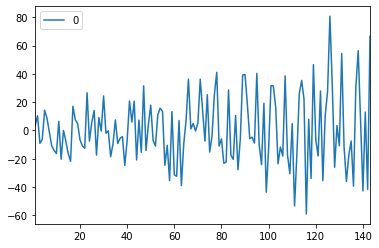

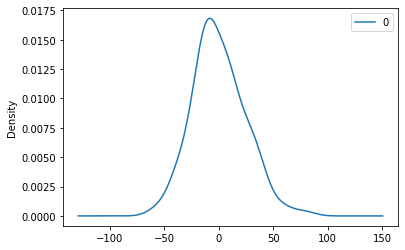

                0
count  143.000000
mean     0.314273
std     24.164583
min    -59.051774
25%    -15.911233
50%     -3.943744
75%     14.163293
max     80.706566


In [49]:
model = ARIMA(airlines_passengers, order=order1)
model_fit = model.fit(disp=0)
print(model_fit.summary())
# plot residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

In [70]:
am = arch_model(airlines_passengers, p=order1[0], o=order1[1], q=order1[2], dist='StudentsT')
res = am.fit(update_freq=5, disp='off')
print(res.summary())

                      Constant Mean - GJR-GARCH Model Results                       
Dep. Variable:                        Count   R-squared:                      -0.421
Mean Model:                   Constant Mean   Adj. R-squared:                 -0.421
Vol Model:                        GJR-GARCH   Log-Likelihood:               -839.997
Distribution:      Standardized Student's t   AIC:                           1699.99
Method:                  Maximum Likelihood   BIC:                           1729.69
                                              No. Observations:                  144
Date:                      Thu, Apr 23 2020   Df Residuals:                      134
Time:                              15:26:06   Df Model:                           10
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu  

e:\Users\chefranov_as\AppData\Roaming\Python\Python37\site-packages\arch\univariate\base.py:293: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 1.429e+04. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 0.1 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  data_scale_warning.format(orig_scale, rescale), DataScaleWarning


Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


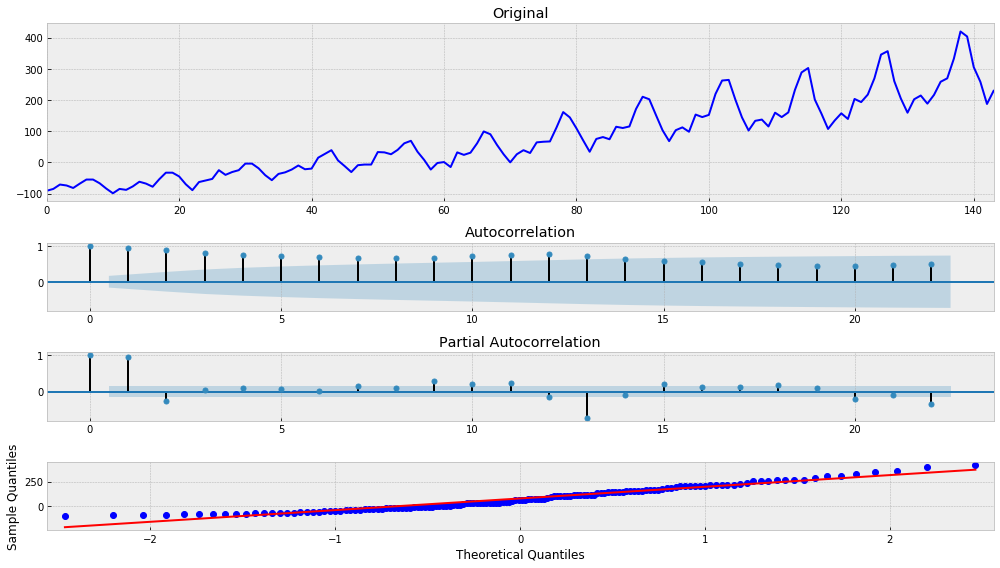

In [71]:
tsplot(res.resid)

In [65]:
am = arch_model(airlines_passengers_stat, p=order[0], o=order[1], q=order[2], dist='StudentsT')
res = am.fit(update_freq=5, disp='off')
print(res.summary())

                        Constant Mean - GARCH Model Results                         
Dep. Variable:                            y   R-squared:                      -0.000
Mean Model:                   Constant Mean   Adj. R-squared:                 -0.000
Vol Model:                            GARCH   Log-Likelihood:                229.094
Distribution:      Standardized Student's t   AIC:                          -436.188
Method:                  Maximum Likelihood   BIC:                          -404.561
                                              No. Observations:                  131
Date:                      Thu, Apr 23 2020   Df Residuals:                      120
Time:                              14:54:36   Df Model:                           11
                                  Mean Model                                  
                  coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------

e:\Users\chefranov_as\AppData\Roaming\Python\Python37\site-packages\arch\univariate\base.py:293: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.002086. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  data_scale_warning.format(orig_scale, rescale), DataScaleWarning


Results of Dickey-Fuller Test:
Test Statistic                  -4.443325
p-value                          0.000249
#Lags Used                      12.000000
Number of Observations Used    118.000000
Critical Value (1%)             -3.487022
Critical Value (5%)             -2.886363
Critical Value (10%)            -2.580009
dtype: float64


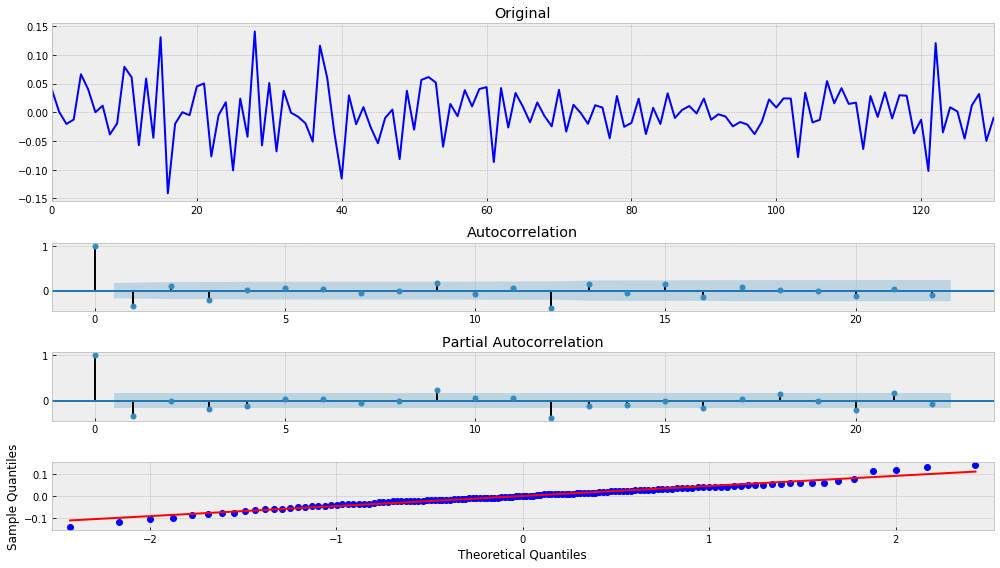

In [66]:
tsplot(res.resid)

Iteration:      1,   Func. Count:     11,   Neg. LLF: -128.34343844912175
Iteration:      2,   Func. Count:     24,   Neg. LLF: -128.56018387698458
Iteration:      3,   Func. Count:     36,   Neg. LLF: -129.26610477083125
Iteration:      4,   Func. Count:     48,   Neg. LLF: -129.6445043832497
Iteration:      5,   Func. Count:     59,   Neg. LLF: -129.83515866612947
Iteration:      6,   Func. Count:     71,   Neg. LLF: -130.10134193100095
Iteration:      7,   Func. Count:     83,   Neg. LLF: -130.51784811228617
Iteration:      8,   Func. Count:     95,   Neg. LLF: -130.7868894749402
Iteration:      9,   Func. Count:    107,   Neg. LLF: -130.80394673844248
Iteration:     10,   Func. Count:    118,   Neg. LLF: -130.86796230083098
Iteration:     11,   Func. Count:    130,   Neg. LLF: -130.88393180672912
Iteration:     12,   Func. Count:    141,   Neg. LLF: -131.0713019334269
Iteration:     13,   Func. Count:    153,   Neg. LLF: -131.153701600127
Iteration:     14,   Func. Count:    165,  

e:\Users\chefranov_as\AppData\Roaming\Python\Python37\site-packages\arch\univariate\base.py:293: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.002578. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  data_scale_warning.format(orig_scale, rescale), DataScaleWarning


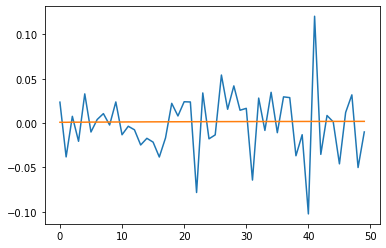

In [67]:
n_test = 50
train, test = airlines_passengers_stat[:-n_test], airlines_passengers_stat[-n_test:]
# define model
model = arch_model(train, mean='Zero', vol='GARCH', p=order[0], o=order[1], q=order[2])
# fit model
model_fit = model.fit()
# forecast the test set
yhat = model_fit.forecast(horizon=n_test)
# plot the actual variance
plt.plot(test)
# plot forecast variance
plt.plot(yhat.variance.values[-1, :])
plt.show()